In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("input/garbage classification/Garbage classification"))
print(os.listdir('input/garbage classification/'))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['Garbage classification']


In [4]:
from __future__ import absolute_import, division, print_function
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import zipfile
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob, os, random

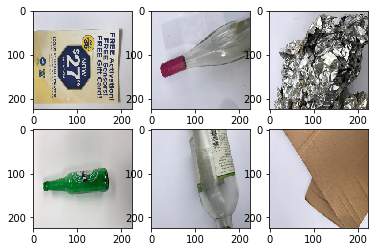

In [8]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
base_path = 'input/garbage classification/Garbage classification'
img_list = glob.glob(os.path.join(base_path, '*/*.jpg'))

for i, img_path in enumerate(random.sample(img_list, 6)):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img, dtype=np.uint8)
    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',
    seed=0
)


Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [10]:
for image_batch, label_batch in train_generator:
    break
image_batch.shape, label_batch.shape

((16, 224, 224, 3), (16, 6))

In [11]:
print (train_generator.class_indices)

labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('labels.txt', 'w') as f:
    f.write(labels)



{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


In [12]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [13]:
path = 'labels.txt'
label = np.array(open(path).read().splitlines())

In [14]:
IMG_SHAPE = (224,224,3)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False, 
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [15]:
base_model.trainable = False

In [20]:
#from tensorflow import keras
#model = tf.keras.Sequential([
#  base_model,
#  keras.layers.GlobalAveragePooling2D(),
#  keras.layers.Dense(6, activation='sigmoid')
#])

In [16]:
model = tf.keras.Sequential([
  base_model,
  tf.keras.layers.Conv2D(128, 3, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling2D(),
  tf.keras.layers.Dense(6, activation='softmax')
])

In [18]:
# model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), 
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [17]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.0001), #Adam(), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [19]:
batch_size = 32
epochs = 50
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

history = model.fit_generator(train_generator, 
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs, 
                              workers=4,
                              validation_data=validation_generator, 
                              validation_steps=validation_steps)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
71/71 [==============================] - 29s 405ms/step - loss: 1.0675 - accuracy: 0.6206 - val_loss: 0.6123 - val_accuracy: 0.7589
Epoch 2/50
71/71 [==============================] - 28s 400ms/step - loss: 0.6690 - accuracy: 0.7544 - val_loss: 0.5202 - val_accuracy: 0.7589
Epoch 3/50
71/71 [==============================] - 28s 398ms/step - loss: 0.5619 - accuracy: 0.7852 - val_loss: 0.5815 - val_accuracy: 0.7679
Epoch 4/50
71/71 [==============================] - 29s 409ms/step - loss: 0.5088 - accuracy: 0.8204 - val_loss: 0.3620 - val_accuracy: 0.8839
Epoch 5/50
71/71 [==============================] - 30s 416ms/step - loss: 0.4559 - accuracy: 0.8505 - val_loss: 0.6392 - val_accuracy: 0.7857
Epoch 6/50
71/71 [==============================] - 30s 425ms/step - loss: 0.3670 - accuracy: 0.8701 - val_loss: 0.7307 - val_accuracy: 0.7500
Epoch 7/50
71/71 [==============================] - 32s 449ms/step

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img_path = 'input/garbage classification/Garbage classification/paper/paper8.jpg'
img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = label[np.argmax(p[0][0], axis=-1)]
print(predicted_class)

## Fine Tuning

In [ ]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [ ]:
#model.compile(loss='binary_crossentropy',
 #             optimizer = tf.keras.optimizers.RMSprop(lr=2e-5),
  #            metrics=['accuracy'])
#model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer = tf.keras.optimizers.Adam(1e-5),
              metrics=['accuracy'])

In [ ]:
history_fine = model.fit_generator(train_generator, 
                                   steps_per_epoch = steps_per_epoch,
                                   epochs=epochs, 
                                   workers=4,
                                   validation_data=validation_generator, 
                                   validation_steps=validation_steps) 

In [ ]:
acc += history_fine.history['acc']
val_acc += history_fine.history['val_acc']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

model.save("Garbge.h5")

In [21]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, 'model-tfjs')

model.save("Garbge.h5")

file = "Garbage.h5"
keras.models.save_model(model,file)
converter = tf.lite.TFLiteConverter.from_keras_model_file(file)
tflite_model=converter.convert()
open("garbage.tflite",'wb').write(tflite_model)

In [ ]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.9, 1])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 0.2])
plt.plot([epochs-1,epochs-1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#from tensorflow.contrib import lite
#file = "Garbage.h5"
#keras.models.save_model(model,file)
#converter = lite.TocoConverter.from_keras_model_file(file)
#tflite_model=conerter.convert()
#open("garbage.tflite",'wb').write(tflite_model)

In [ ]:
#import tensorflow as tf
#file = "Garbage.h5"
#keras.models.save_model(model,file)
#converter = tf.lite.TFLiteConverter.from_keras_model_file(file)
#tflite_model=converter.convert()
#open("garbage.tflite",'wb').write(tflite_model)

In [ ]:
#tf.lite.TFLiteConverter.from_saved_model("saved_model", input_shapes={("image_tensor" : [1,300,300,3])})


In [ ]:
saved_model_dir = '../'
tf.saved_model.save(model, saved_model_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
from IPython.display import FileLinks
FileLinks('.')

In [ ]:
import PIL.Image as Image



In [ ]:
#img=Image.open(img_path).resize((224, 224))


In [ ]:
img_path = '../input/garbage classification/Garbage classification/cardboard/cardboard5.jpg'

img=np.array(img)/255.0
img = image.load_img(img_path, target_size=(224, 224))
img = image.img_to_array(img, dtype=np.uint8)
plt.imshow(img.squeeze())
p=model.predict(img[np.newaxis, ...])
print(p.shape)
predicted_class = np.argmax(p[0], axis=-1)
print(predicted_class)

import keras
import tensorflow as tf
model = keras.models.load_model(file)
model._make_predict_function()
graph = tf.get_default_graph()

def some_route():
	...
	global graph
	with graph.as_default():
		outputs = model.predict(img)
	...

In [ ]:
#Model = tf.keras.models.load_model(file)

global graph,model
graph = tf.get_default_graph()

with graph.as_default():
     y = model.predict(img[np.newaxis, ...])

In [ ]:
#from keras import backend as K
#K.clear_session()

In [ ]:
#desired_batch_size=7
#nb_samples = len(validation_generator)
#p=model.predict_generator(validation_generator, np.ceil(nb_samples/desired_batch_size))
#K.clear_session()